In [78]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn import datasets, linear_model
from sklearn import metrics
import os
%matplotlib inline

path = os.getcwd()
path = path + '\Dataset\Coastal Data System - Waves.csv'

#Read csv
waves = pd.read_csv(path)

waves.columns = ["time", "Hs", "Hmax","Tz","Tp","direction", "temp"]
waves["time"] = pd.to_datetime(waves["time"])
waves["year"] = waves["time"].astype(str).str[0:4]
waves["year"] = waves["year"].astype(int)

waves["time1"] = waves["time"].astype(str).str[11:16]
waves["month"] = waves["time"].astype(str).str[5:7]

#Floor(Round to .0) peak direction
waves["dir"] = 10* (waves["direction"] // 10)

#Floor(Round to .0) temperature
waves["temp1"] = (waves["temp"] // 1)

waves.info()
waves.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43726 entries, 0 to 43725
Data columns (total 12 columns):
time         43726 non-null datetime64[ns]
Hs           43726 non-null float64
Hmax         43726 non-null float64
Tz           43726 non-null float64
Tp           43726 non-null float64
direction    43726 non-null float64
temp         43726 non-null float64
year         43726 non-null int32
time1        43726 non-null object
month        43726 non-null object
dir          43726 non-null float64
temp1        43726 non-null float64
dtypes: datetime64[ns](1), float64(8), int32(1), object(2)
memory usage: 3.8+ MB


,time,Hs,Hmax,Tz,Tp,direction,temp,year,time1,month,dir,temp1
0,2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65,2017,01:00,01,40.0,25.0
1,2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50,2017,01:30,01,70.0,25.0
2,2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45,2017,02:00,01,90.0,25.0
3,2017-01-01 02:30:00,0.718,1.61,4.614,6.181,68.0,25.45,2017,02:30,01,60.0,25.0
4,2017-01-01 03:00:00,0.707,1.34,4.568,4.705,73.0,25.50,2017,03:00,01,70.0,25.0


In [49]:
X = waves[['Hs','Hmax','Tz','Tp','dir']]
y = waves[['temp1']]

X.head()




,Hs,Hmax,Tz,Tp,dir
0,0.763,1.15,4.520,5.513,40.0
1,0.770,1.41,4.582,5.647,70.0
2,0.747,1.16,4.515,5.083,90.0
3,0.718,1.61,4.614,6.181,60.0
4,0.707,1.34,4.568,4.705,70.0


In [79]:
X = waves[['Hs','Hmax','Tz','Tp','dir']]
y = waves[['temp1']]

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# fit a model
lm = linear_model.BayesianRidge()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print ('Score:'), model.score(X_test, y_test)


(21863, 5) (21863, 1)
(21863, 5) (21863, 1)
Score:


(None, 0.44560435186355096)

Text(0, 0.5, 'Predictions')

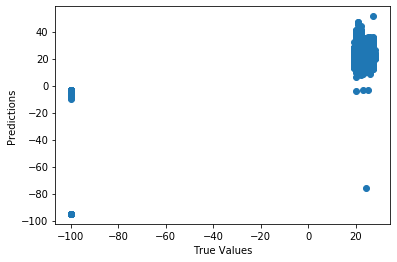

In [80]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')